**Autor: Gustavo Henrique Reis de Araújo Lima**

**Instituição: CEFET - MG - Unidade Contagem**

**(feito em Julia 1.4)**

**Última atualização: 05/05/2020**

**Requisitos: Plots.jl, LaTeXStrings.jl**

***
# **1. Cinemática**

## **1.3 Movimento Retilíneo Uniformemente Variado (MRUV)**

### **1.3.3 Deslocamento no MRUV**

Vamos utilizar o gráfico de velocidade em função do tempo para encontrar o deslocamento do objeto entre os instantes $t_1$ e $t_2$. A área da figura formada entre a reta que representa a velocidade e o eixo do tempo, limitada pelos instantes $t_1$ e $t_2$ representa o deslocamento $\Delta s_{12}$ neste intervalo de tempo.

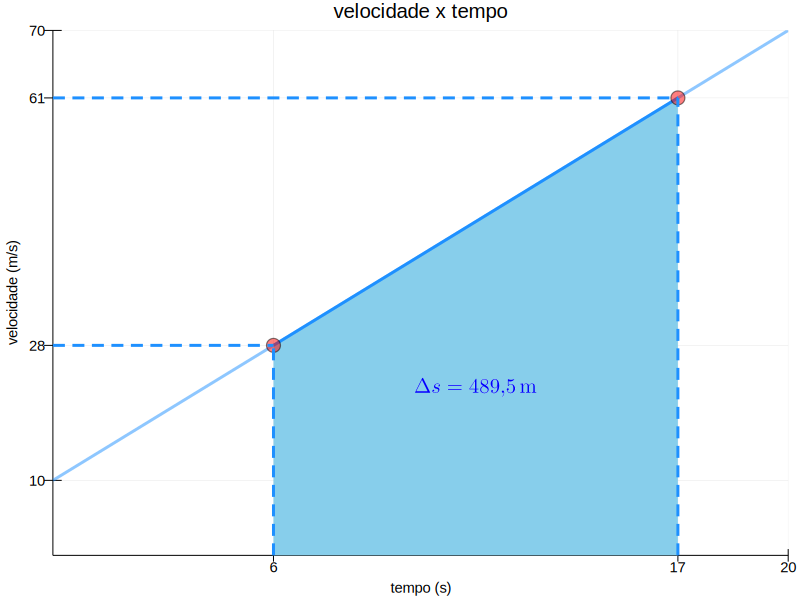

In [2]:
using Plots
using LaTeXStrings
using Printf

#definindo a função v(t): a é a aceleração, v0 é a velocidade inicial, t é o instante de tempo
function vel(a::Real, v0::Real, t::Real)
    return a*t + v0
end

#definindo função para trocar ponto decimal por vírgula decimal nas strings em latex
function pontoVirgula(a::LaTeXString)
    b = replace(a, "." => ",\\!")
    return b
end

#definindo características padrões para os gráficos
default(size = [800,600], grid = true, markersize = 8, framestyle = :origin, linewidth = 3, legend = :false)

#definindo vetor com os valores de t utilizados para desenhar o gráfico
t = 0:1:20
tmax = maximum(t)

#definindo vetor com as velocidades utilizadas para desenhar o gráfico
a = 3
v0 = 10
vx = vel.(a,v0,t)
vxmax = maximum(vx)

#definindo instantes para calculo da área do gráfico
t1 = 6; t2 = 17
Δt = t2 - t1
v11 = vel(a,v0,t1)
v12 = vel(a,v0,t2)

#cálculo da área do trapézio
desl = (v12 + v11) * Δt/2

#string de deslocamento
dsstr = @sprintf("%3.1f", desl)
dstext = latexstring("\\Delta s = ", dsstr, "\\,{\\rm m}")
dstext = pontoVirgula(dstext)

#anotação com o valor da área do gráfico (deslocamento)
annots = [((t1+t2)/2, 0.8*v11, text(dstext, halign = :center, color = :blue, pointsize = 14))]

#desenhando o gráfico de v(t)
plot(t,vx, xaxis = ("tempo (s)", (0, tmax), [0,t1,t2,tmax], font(10)),
    yaxis = ("velocidade (m/s)", (0,vxmax), [v0,v11,v12,vxmax], font(10)), title = "velocidade x tempo",
    color = :dodgerblue, alpha = 0.5)

#marcando a função v(t) entre t1 e t2
plot!([t1,t2],[v11,v12], color = :dodgerblue, fill = (0, :skyblue), ann = annots)

#marcando instantes t1 e t2 no gráfico
scatter!([t1,t2],[v11,v12], marker = :circle, color = :red, alpha = 0.5)

#localizando coordenadas do ponto (v1,t1) no gráfico
plot!([t1,t1],[0,v11], ls = :dash, color = :dodgerblue)
plot!([0,t1],[v11,v11], ls = :dash, color = :dodgerblue)

#localizando coordenadas do ponto (v2,t2) no gráfico
plot!([t2,t2],[0,v12], ls = :dash, color = :dodgerblue)
plot!([0,t2],[v12,v12], ls = :dash, color = :dodgerblue)

A figura formada é um trapézio, e a área $A$ de um trapézio é igual a:

$$ A = \frac{(B + b)\cdot h}{2}, $$

sendo $B$ sua base maior, $b$ sua base menor e $h$ sua altura. A altura do trapézio é igual a $\Delta t_{12} = t_2 - t1$, a base menor é a velocidade no instante $t_1$, $v(t_1)$, e a base maior é $v(t_2)$. Então:

$$ \Delta s_{12} = \frac{\big[v(t_2) + v(t_1)\big] \cdot \Delta t_{12}}{2},$$

mas 

$$v(t_2) = v(t_1) + \Delta v_{12},$$ 

portanto,

$$\Delta s_{12} = \frac{\big[v(t_1) + \Delta v_{12} + v(t_1)\big] \cdot \Delta t_{12}}{2} = \frac{\big[2\cdot v(t_1) + \Delta v_{12} \big] \cdot \Delta t_{12}}{2},$$

$$\Delta s_{12} = v(t_1)\cdot \Delta t_{12} + \frac{\Delta v_{12} \cdot \Delta t_{12}}{2}.$$

Lembrando que $\Delta v_{12} = a \cdot \Delta t_{12}$, é possível fazer outra substituição na equação acima:

$$\Delta s_{12} = v(t_1)\cdot \Delta t_{12} + \frac{a \cdot \Delta t_{12} \cdot \Delta t_{12}}{2},$$

$$\Delta s_{12} = v(t_1)\cdot \Delta t_{12} + \frac{a \cdot \Delta t_{12}^{2}}{2}$$

Com a equação acima é possível descobrir o deslocamento entre dois instantes de tempo quaisquer, sabendo a aceleração do objeto, sua velocidade no instante inicial e o intervalo de tempo entre os dois instantes. 

Se quisermos calcular o deslocamento $\Delta s(t)$ entre o instante $t=0$ e um instante $t$ qualquer, precisamos apenas substituir $v(t_1)$ por $v_0$, e $\Delta t_{12}$ por $\Delta t = t - 0 = t$ na equação acima, e:

<div class="alert alert-block alert-warning">
<b>Equação do deslocamento em função do tempo (MRUV):</b> $$\Delta s(t) = v_0 \cdot t + \frac{a \cdot t^2}{2}.$$
</div>


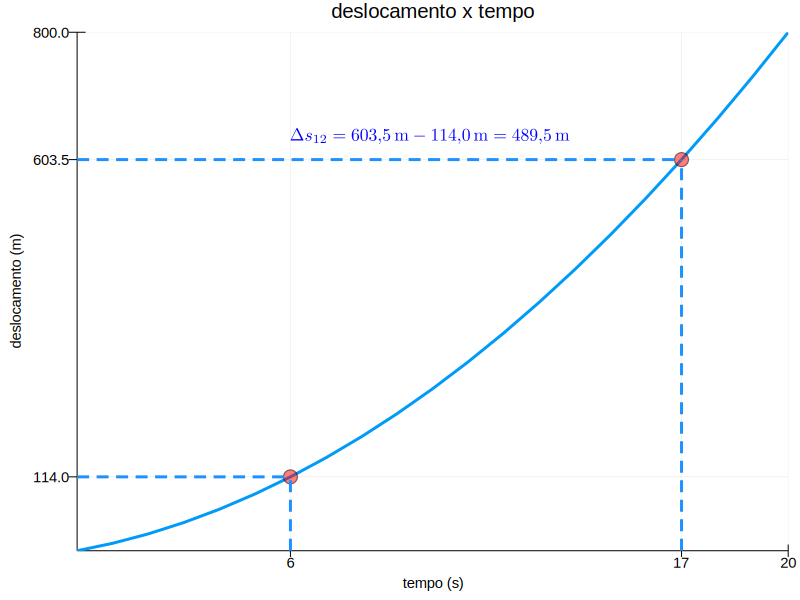

In [3]:
#função que calcula o deslocamento em função do tempo
function sx(a::Real, v0::Real, t::Real)
    return v0*t + (a*t^2)/2
end

#cálculo do deslocamento em função do tempo para os instantes de tempos presentes no vetor t
Δs = sx.(a,v0,t)

#valor do deslocamento máximo
Δsmax = maximum(Δs)

#deslocamento em t1
Δs1 = sx(a,v0,t1)

#deslocamento em t2
Δs2 = sx(a,v0,t2)

#deslocamento entre t1 e t2
Δs12 = Δs2 - Δs1

#string com o valor do deslocamento
s12str = @sprintf("%4.1f", Δs12)
s12text = latexstring("\\Delta s_{12} = ", Δs2, "\\,{\\rm m} -", Δs1, "\\,{\\rm m} = ", s12str, "\\,{\\rm m}")
s12text = pontoVirgula(s12text)

#anotação sobre deslocamento
annotds = [(t1, 0.8*Δsmax, text(s12text, halign = :left, pointsize = 12, color = :blue))]

#gráfico de deslocamento x tempo
plot(t, Δs, xaxis = ("tempo (s)", (0,tmax), [0,t1,t2,tmax], font(10)), 
    yaxis = ("deslocamento (m)", (0,Δsmax), [0,Δs1, Δs2, Δsmax], font(10)), 
    title = "deslocamento x tempo", ann = annotds)

#marcando os instantes t1 e t2 no gráfico
scatter!([t1,t2],[Δs1, Δs2], marker = :circle, color = :red, alpha = 0.5)

#localizando coordenadas do ponto (v1,t1) no gráfico
plot!([t1,t1],[0,Δs1], ls = :dash, color = :dodgerblue)
plot!([0,t1],[Δs1,Δs1], ls = :dash, color = :dodgerblue)

#localizando coordenadas do ponto (v2,t2) no gráfico
plot!([t2,t2],[0,Δs2], ls = :dash, color = :dodgerblue)
plot!([0,t2],[Δs2,Δs2], ls = :dash, color = :dodgerblue)

O gráfico acima mostra a função de deslocamento em função do tempo para o objeto analisado, marcando o deslocamento do objeto nos instantes $t_1$, $\Delta s_1$, e no instante $t_2$, $\Delta s_2$.

Como não houve mudança no sentido do movimento do objeto, o módulo do deslocamento em qualquer instante é igual à distância percorrida pelo objeto. Nem sempre isso é verdade para objetos em MRUV! A partir do deslocamento e da distância percorrida podemos calcular a velocidade média do objeto e sua rapidez média:

In [4]:
#cálculo da velocidade média
vmed12 = Δs12/Δt

#cálculo da rapidez média
rpdmed12 = abs(Δs12)/Δt

#gerando strings de texto
desloctext = @sprintf("Deslocamento entre %3.1f s e %3.1f s: %4.1f m. \n", t1, t2, Δs12)
desloctext = replace(desloctext, "." => ",", count = 3)

disttext = @sprintf("Distância percorrida entre %3.1f s e %3.1f s: %4.1f m. \n", t1, t2, abs(Δs12))
disttext = replace(disttext, "." => ",", count = 3)

velt1text = @sprintf("t = %3.1f s: %4.1f m/s. \n", t1, v11)
velt1text = replace(velt1text, "." => ",", count = 2)

velt2text = @sprintf("t = %3.1f s: %4.1f m/s. \n", t2, v12)
velt2text = replace(velt2text, "." => ",", count = 2)

velmed = @sprintf("Velocidade media entre %3.1f s e %3.1f s: %4.1f m/s. \n", t1, t2, vmed12)
velmed = replace(velmed, "." => ",", count = 3)

rpdmed = @sprintf("Rapidez média entre %3.1f s e %3.1f s: %4.1f m/s. \n", t1, t2, rpdmed12)
rpdmed = replace(rpdmed, "." => ",", count = 3)

#mostrando strings de texto
printstyled("-------------------------------------------------------\n", color = :blue)
printstyled("Velocidades instantâneas \n", color = :blue)
printstyled(velt1text, color = :blue, bold = :true)
printstyled(velt2text, color = :blue, bold = :true)
printstyled("-------------------------------------------------------\n", color = :blue)
printstyled("-------------------------------------------------------\n", color = :red)
printstyled(desloctext, color = :red, bold = :true)
printstyled(disttext, color = :red, bold = :true)
printstyled("-------------------------------------------------------\n", color = :red)
printstyled("-------------------------------------------------------\n", color = :green)
printstyled(velmed, color = :green, bold = :true)
printstyled(rpdmed, color = :green, bold = :true)
printstyled("-------------------------------------------------------\n", color = :green)

-------------------------------------------------------
Velocidades instantâneas 
t = 6,0 s: 28,0 m/s. 
t = 17,0 s: 61,0 m/s. 
-------------------------------------------------------
-------------------------------------------------------
Deslocamento entre 6,0 s e 17,0 s: 489,5 m. 
Distância percorrida entre 6,0 s e 17,0 s: 489,5 m. 
-------------------------------------------------------
-------------------------------------------------------
Velocidade media entre 6,0 s e 17,0 s: 44,5 m/s. 
Rapidez média entre 6,0 s e 17,0 s: 44,5 m/s. 
-------------------------------------------------------


Se a posição do objeto for conhecida em qualquer instante de tempo, é possível obter a equação da posição em função do tempo através da análise do deslocamento que foi feita acima. Voltando à equação do deslocamento em função do tempo, temos:

$$\Delta s(t) = v_0 \cdot t + \frac{a \cdot t^2}{2},$$

como $\Delta s(t) = s(t) - s_0$, onde $s_0$ é a posição inicial do objeto, então:

$$s(t) - s_0 = v_0 \cdot t + \frac{a \cdot t^2}{2},$$

$$s(t) = s_0 + v_0 \cdot t + \frac{a \cdot t^2}{2}.$$

Os coeficientes que definem a equação que descreve a posição do objeto em função do tempo no MRUV são: posição inicial, $s_0$; velocidade inicial, $v_0$; e a aceleração constante $a$.

<div class="alert alert-block alert-warning">
<b>Equação da posição em função do tempo (MRUV):</b> $$s(t) = s_0 + v_0 \cdot t + \frac{a \cdot t^2}{2}.$$
</div>

Vamos supor para o objeto analisado que sua posição no instante $t = 7,\!0\,\rm{s}$, seja $s = 100\,{\rm m}$, como descobrimos sua equação de $s(t)$?

Se 

$$s(7,\!0\,{\rm s}) = s_0 + v_0 \cdot 7,\!0\,{\rm s} + \frac{a \cdot (7,\!0\,{\rm s})^2}{2} = 100\,{\rm m}$$
$$\Downarrow$$
$$s_0 = 100\,{\rm m} - v_0 \cdot 7,\!0\,{\rm s} - \frac{a \cdot (7,\!0\,{\rm s})^2}{2}.$$

In [5]:
#cálculo a posição inicial
s0 = 100 - v0*7 - a*(7^2)/2

#escreve a posição inicial
s0text = @sprintf("Posição inicial (s₀) = %4.1f m", s0)
s0text = replace(s0text, "." => ",")
printstyled(s0text, color = :red, bold = :true)

Posição inicial (s₀) = -43,5 m

Agora, com a posição inicial podemos desenhar o gráfico que mostra a posição em função do tempo.

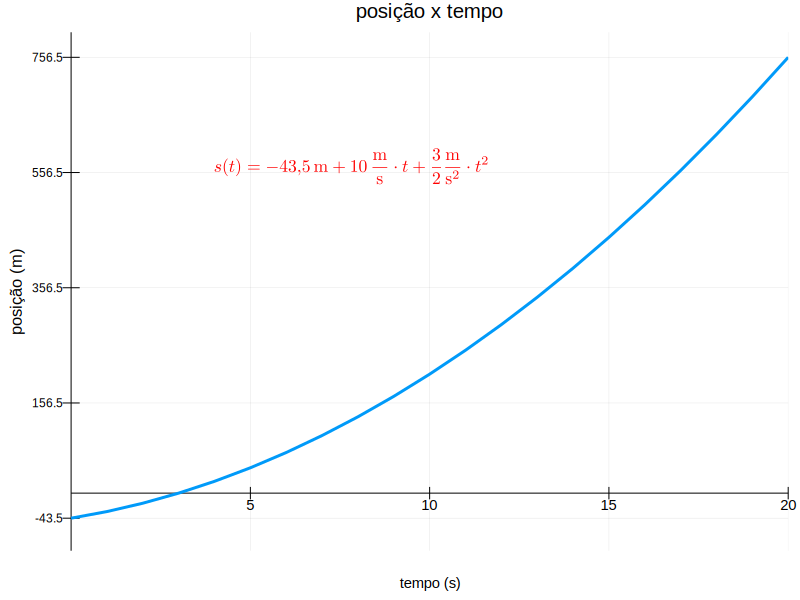

In [6]:
#função que calcula a posição em função do tempo no MRUV
function xp(s0::Real,v0::Real,a::Real,t::Real)
    return s0 + v0*t + (a*t^2)/2
end

#posição do objeto nos instantes definidos por t
s = xp.(s0,v0,a,t)

#posição máxima dentro de s
smax = maximum(s)

#posição mínima dentro de s
smin = minimum(s)

#definindo limites do eixo y
ylim = (floor(smin, digits = -2), ceil(smax, digits = -2))

#string com a equação de s(t)
eqstext = latexstring("s(t) = ", s0, "\\,{\\rm m} + ", v0, "\\,{\\rm \\frac{m}{s}} \\cdot t + \\frac{", a, "}{2} {\\rm \\frac{m}{s^2}} \\cdot t^2")
eqstext = pontoVirgula(eqstext)

ann_eqs = [(tmax/5, 0.75*smax, text(eqstext, halign = :left, pointsize = 12, color = :red))]

#desenhando gráfico de posição x tempo
plot(t,s, title = "posição x tempo", xaxis = ("tempo (s)", (0,tmax), range(0, tmax, length = 5), font(10)),
    yaxis = ("posição (m)", ylim, range(smin, smax, length = 5)), ann = ann_eqs)

A equação de $s(t)$ é uma equação quadrática ou de 2o. grau já que tem um termo com $t^2$. 

Abaixo podemos ver a animação do movimento que acabamos de analisar.

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
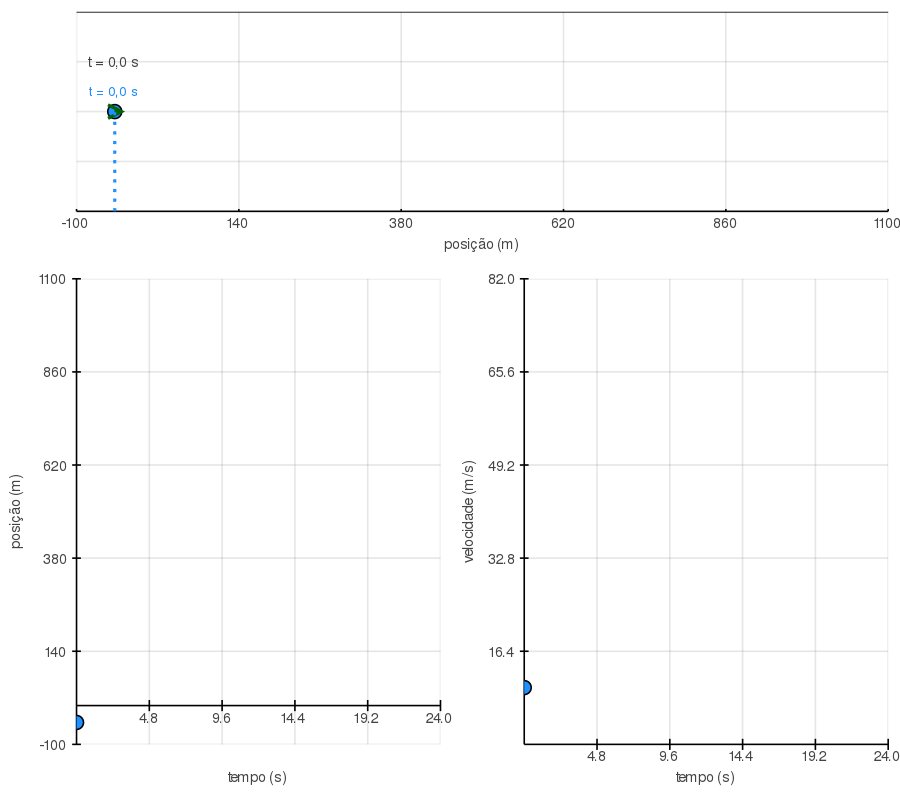

In [161]:
#intervalo entre dois instantes de tempo consecutivos
dt = 0.1

#vetor com instantes de tempo utilizados na animação
t_ani = 0:dt:24

#s0 = 200
#v0 = 40
#a = -5

#calculando as posições nos instantes de tempo em t_ani
x_ani = xp.(s0,v0,a,t_ani)

#posição máxima em x_ani
x_max = maximum(x_ani)

#posição mínima em x_ani
x_min = minimum([x_ani;0])

#definindo limites do eixo de posição
xlim = (floor(x_min, digits = -2), ceil(x_max, digits = -2))

#o objeto está parado em relação à direção y
y_ani = zeros(size(t_ani,1))

#calculando as velocidades instantâneas nos instantes de tempo presentes em t_ani
v_ani = vel.(a,v0,t_ani)

#velocidade máxima
v_max = maximum(v_ani)

#velocidade mínima
v_min = minimum([v_ani;0])

#inicializando vetores utilizados para marcar posição e tempo na animação
xpace = []
ypace= []
time_ann = []

tticks = range(0,t_ani[end], length = 6)

#loop para criação da animação
@gif for i = 1:size(t_ani,1)
        
    #anotação de tempo acima do objeto em movimento
    tstr = @sprintf("t = %3.1f s", t_ani[i])
    tstr = replace(tstr, "." => ",")
    ann_t = [(x_ani[i], 2.5, text(tstr, pointsize = 10, halign = :center))]
    
    #animação do movimento do objeto com seu vetor velocidade
    p1 = scatter([x_ani[i]], [y_ani[i]], marker = :circle, color = :dodgerblue,
        xaxis = ("posição (m)", xlim, range(xlim[1], xlim[2], length = 6), font(10)),
        ylims = (-5,5), yaxis = (showaxis = :off), framestyle = :box, ann = ann_t)
    quiver!([x_ani[i]], [y_ani[i]], quiver = ([v_ani[i]],[0]), lw = 3, color = :darkgreen)
    
    #definindo os pontos que serão utilizados na marcação da distância e do tempo
    if (t_ani[i] in tticks)
        push!(xpace,[x_ani[i],x_ani[i]])
        push!(ypace,[-10,0])
        push!(time_ann,(x_ani[i],1,text(tstr, pointsize = 9, color = :dodgerblue)))
    end
    
    #criando marcações na animação do movimento do objeto
    plot!(xpace,ypace, lw = 3, linestyle = :dot, color = :dodgerblue, ann = time_ann)
    
    #animação da posição do objeto em função do tempo
    p2 = scatter([t_ani[i]],[x_ani[i]], marker = :circle, color = :dodgerblue, 
        xaxis = ("tempo (s)", (0,t_ani[end]), tticks, font(10)),
        yaxis = ("posição (m)", xlim, range(xlim[1], xlim[2], length = 6), font(10)),
        framestyle = :origin)
    plot!(t_ani[1:i],x_ani[1:i], lw = 3, ls = :dash, color = :red, alpha = 0.5)
    
    #animação da velocidade do objeto em função do tempo
    p3 = scatter([t_ani[i]],[v_ani[i]], marker = :circle, color = :dodgerblue, 
        xaxis = ("tempo (s)", (0,t_ani[end]), tticks, font(10)),
        yaxis = ("velocidade (m/s)", (v_min,v_max), range(v_min, v_max, length = 6), font(10)),
        framestyle = :origin)
    plot!(t_ani[1:i],v_ani[1:i], lw = 3, ls = :dash, color = :darkgreen, alpha = 0.5)
    
    #posicionando e desenhando as três animações
    l = @layout [a{0.3h}; b c]
    plot(p1, p2, p3, layout=l, size = (900,800))
end

### **1.3.4 Outros exemplos**

Podemos observar outros tipos de trajetórias no MRUV ao variar os valores da posição inicial, velocidade inicial e aceleração:

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
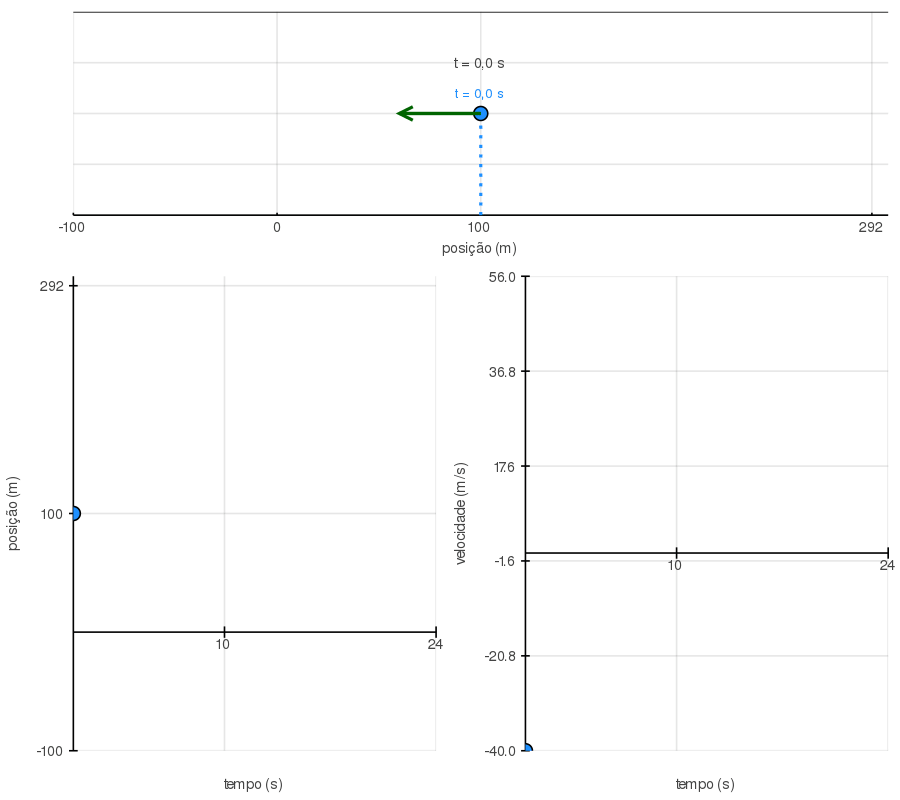

In [174]:
#intervalo entre dois instantes de tempo consecutivos
#dt = 0.1

#vetor com instantes de tempo utilizados na animação
#t_ani = 0:dt:24

#modifique esses valores para observar como eles influenciam no MRUV
s02 = 100
v02 = -40
a2 = 4

#calculando as posições nos instantes de tempo em t_ani
x2_ani = xp.(s02,v02,a2,t_ani)

#instante em que o objeto passa pelo vértice da parábola
t_vert = -v02/a2

#posição do vértice da parábola
x2_vert = xp(s02,v02,a2,t_vert)

#posição máxima em x_ani
x2_max = maximum(x2_ani)

#posição mínima em x_ani
x2_min = minimum([x2_ani;0])

#definindo limites do eixo de posição
x2lim = (floor(x2_min, digits = -1), ceil(x2_max, digits = -1))

#calculando as velocidades instantâneas nos instantes de tempo presentes em t_ani
v2_ani = vel.(a2,v02,t_ani)

#velocidade máxima
v2_max = maximum(v2_ani)

#velocidade mínima
v2_min = minimum([v2_ani;0])

#inicializando vetores utilizados para marcar posição e tempo na animação
xpace = []
ypace= []
time_ann = []

tticks = [0, t_vert, t_ani[end]]
xticks = [0, x2_vert, s02, x2_ani[end]]

#loop para criação da animação
@gif for i = 1:size(t_ani,1)
        
    #anotação de tempo acima do objeto em movimento
    tstr = @sprintf("t = %3.1f s", t_ani[i])
    tstr = replace(tstr, "." => ",")
    ann_t = [(x2_ani[i], 2.5, text(tstr, pointsize = 10, halign = :center))]
    
    #animação do movimento do objeto com seu vetor velocidade
    p1 = scatter([x2_ani[i]], [y_ani[i]], marker = :circle, color = :dodgerblue,
        xaxis = ("posição (m)", x2lim, xticks, font(10)),
        ylims = (-5,5), yaxis = (showaxis = :off), framestyle = :box, ann = ann_t)
    quiver!([x2_ani[i]], [y_ani[i]], quiver = ([v2_ani[i]],[0]), lw = 3, color = :darkgreen)
    
    #definindo os pontos que serão utilizados na marcação da distância e do tempo
    if t_ani[i] % 4 == 0
        push!(xpace,[x2_ani[i],x2_ani[i]])
        push!(ypace,[-10,0])
        push!(time_ann,(x2_ani[i],1,text(tstr, pointsize = 9, color = :dodgerblue)))
    end
    
    #criando marcações na animação do movimento do objeto
    plot!(xpace,ypace, lw = 3, linestyle = :dot, color = :dodgerblue, ann = time_ann)
    
    #animação da posição do objeto em função do tempo
    p2 = scatter([t_ani[i]],[x2_ani[i]], marker = :circle, color = :dodgerblue, 
        xaxis = ("tempo (s)", (0,t_ani[end]), tticks, font(10)),
#        yaxis = ("posição (m)", x2lim, range(x2lim[1], x2lim[2], length = 6), font(10)),
        yaxis = ("posição (m)", x2lim, xticks, font(10)),
        framestyle = :origin)
    plot!(t_ani[1:i],x2_ani[1:i], lw = 3, ls = :dash, color = :red, alpha = 0.5)
    
    #animação da velocidade do objeto em função do tempo
    p3 = scatter([t_ani[i]],[v2_ani[i]], marker = :circle, color = :dodgerblue, 
        xaxis = ("tempo (s)", (0,t_ani[end]), tticks, font(10)),
        yaxis = ("velocidade (m/s)", (v2_min,v2_max), range(v2_min, v2_max, length = 6), font(10)),
        framestyle = :origin)
    plot!(t_ani[1:i],v2_ani[1:i], lw = 3, ls = :dash, color = :darkgreen, alpha = 0.5)
    
    #posicionando e desenhando as três animações
    l = @layout [a{0.3h}; b c]
    plot(p1, p2, p3, layout=l, size = (900,800))
end

As situações possíveis são:

* $a>0$ : parábola tem sua abertura voltada para cima;
* $a<0$ : parábola tem sua abertura voltada para baixo;
* $a=0$ : não há mais parábola, mas uma reta (MRU);
* $v_0 > 0$ e $a > 0$: a parábola sempre sobe para qualquer $t\geq 0$;
* $v_0 < 0$ e $a > 0$: a partir de $t = 0$ a parábola desce cada vez mais lentamente, e algum tempo depois passa a subir;
* $v_0 > 0$ e $a < 0$: a partir de $t = 0$ a parábola sobe cada vez mais lentamente, e algum tempo depois passa a descer;
* $v_0 < 0$ e $a < 0$: a parábola sempre desce para qualquer $t\leq0$;
* $v_0 = 0$: o vértice da parábola está em $t=0$.

A posição inicial $s_0$ define apenas em que altura a parábola cruza o eixo que representa a posição. 

A velocidade instantânea do objeto é sempre nula quando o objeto está no vértice da parábola: a inclinação da parábola é nula no vértice! Assim como vimos no MRU, a inclinação da parábola também nos fornece informação sobre a velocidade do objeto! Se antes do vértice, temos velocidade positiva, após o vértice a velocidade é negativa, ou vice-versa. 

Vamos analisar o deslocamento e a distância percorrida nos diversos tipos de MRUV.

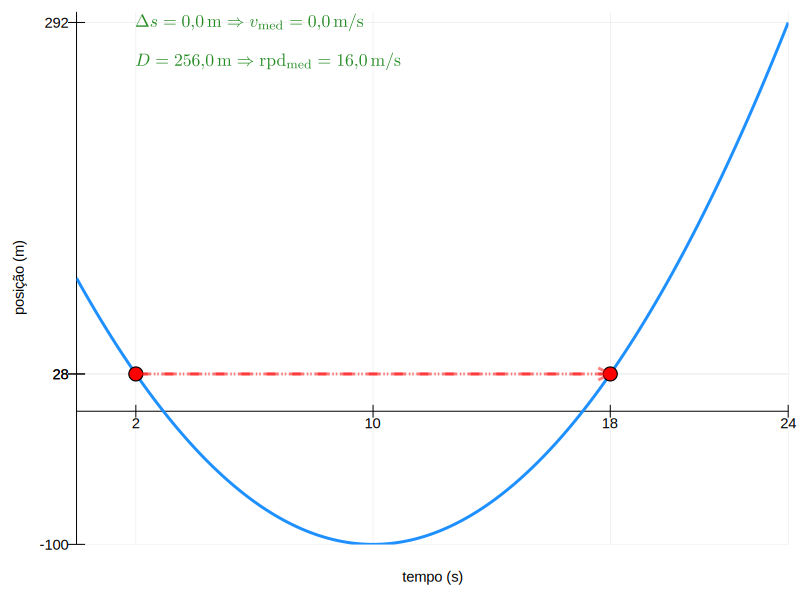

In [175]:
#definindo instante inicial e final para o cálculo do deslocamento e da distância percorrida
t_1 = 2
t_2 = 18

x2_1 = xp(s02,v02,a2,t_1)
x2_2 = xp(s02,v02,a2,t_2)
Δx2 = x2_2 - x2_1
v2med = Δx2/(t_2 - t_1)

#cálculo da distância percorrida entre t1 e t2
dt = 0.0001
D = 0
tempo = t_1
while round(tempo, digits = 4) < t_2
    dD = abs(xp(s02,v02,a2,tempo) - xp(s02,v02,a2,(tempo+dt)))
    D += dD
    tempo += dt
end

t_vert = -v02/a2
x2_vert = xp(s02,v02,a2,t_vert)

rpd_med = D/(t_2 - t_1)

Δsstr = @sprintf("%4.1f", Δx2)
vmstr = @sprintf("%3.1f", v2med)
Dstr = @sprintf("%4.1f", D)
rpstr = @sprintf("%3.1f",rpd_med)

Δstext = latexstring("\\Delta s = ", Δsstr, "\\,{\\rm m} \\Rightarrow v_{\\rm med} = ", vmstr, "\\,{\\rm m/s}")
Δstext = pontoVirgula(Δstext)

Dtext = latexstring("D = ", Dstr, "\\,{\\rm m} \\Rightarrow {\\rm rpd_{med}} = ", rpstr, "\\,{\\rm m/s}")
Dtext = pontoVirgula(Dtext)

#rptext = latexstring("{\\rm rpd_{med}} = ", rpstr, "\\,{\\rm m\s}.")
#rptext = pontoVirgula(rptext)

anots = [(t_1, x2_ani[end], text(Δstext, color = :forestgreen, halign = :left, pointsize = 12)),
(t_1, 0.9*x2_ani[end], text(Dtext, color = :forestgreen, halign = :left, pointsize = 12))]

tticks = [0,t_1,t_2,t_ani[end], t_vert]
yticks = [0,x2_1, x2_2, x2_ani[end], x2_vert]

plot(t_ani,x2_ani, color = :dodgerblue, xaxis = ("tempo (s)", (0,t_ani[end]), tticks, font(10)),
        yaxis = ("posição (m)", x2lim, yticks, font(10)),
        framestyle = :origin)
scatter!([t_1,t_2],[x2_1,x2_2], marker = :circle, color = :red)
quiver!([t_1],[x2_1], quiver=([(t_2 - t_1)],[Δx2]), color = :red, alpha = 0.5, ls = :dashdot, lw = 3)
#quiver!([t_1],[x2_1], quiver=([0],[v2med]), color = :green, lw = 3)
annotate!(anots)

Podemos notar que a distância percorrida $D$ só é igual ao módulo do deslocamento $\Delta s$, no movimento retilíneo, quando o objeto não muda seu sentido de movimento. Assim sendo, a rapidez média ${\rm rpd_{med}}$ é igual ao módulo da velocidade média $v_{\rm med}$, apenas quando não há mudança de sentido no movimento do objeto.

### **1.3.5 Equação de Torricelli**

É possível obter uma outra equação para o deslocamento $\Delta s$, partindo de: 

$$\Delta s_{12} = v_1 \cdot \Delta t_{12} + \frac{a \cdot \Delta t_{12}^{2}}{2}.$$

Lembrando que:

$$a = \frac{\Delta v_{12}}{\Delta t} \therefore \Delta t = \frac{\Delta v_{12}}{a} = \frac{v_2 - v_1}{a}.$$

Substituindo $\Delta t$ na equação de $\Delta s_{12}$ pela relação encontrada logo acima:

$$\Delta s_{12} = v_1 \cdot \frac{v_2 - v_1}{a} + \frac{a \cdot \big(\frac{v_2 - v_1}{a}\big)^2}{2},$$

$$\Downarrow$$

$$\Delta s_{12} = v_1 \cdot \frac{v_2 - v_1}{a} + \frac{a}{2} \cdot \frac{(v_{2}^{2} - 2\cdot v_1 \cdot v_2  + v_{1}^{2})}{a^2},$$

$$\Downarrow$$

$$\Delta s_{12} = \frac{(v_1 \cdot v_2 - v_{1}^{2})}{a} + \frac{(v_{2}^{2} - 2\cdot v_1 \cdot v_2  + v_{1}^{2})}{2a},$$

$$\Downarrow$$

$$2a \cdot \Delta s_{12} = 2(v_1 \cdot v_2 - v_{1}^{2}) + (v_{2}^{2} - 2\cdot v_1 \cdot v_2  + v_{1}^{2}),$$

$$\Downarrow$$

$$2a \cdot \Delta s_{12} = v_{2}^{2} - v_{1}^{2},$$

ou seja,

$$\Delta s_{12} = \frac{v_{2}^{2} - v_{1}^{2}}{2a}.$$

A equação acima é conhecida como equação de Torricelli, e através dela é possível relacionar o deslocamento $\Delta s_{12}$ em um certo intervalo de tempo, com as velocidades inicial $v_1$, velocidade final $v_2$ e aceleração $a$ do objeto nesse intervalo, sem a necessidade de se conhecer o valor do intervalo $\Delta t$.

<div class="alert alert-block alert-warning">
<b>Equação de Torricelli (MRUV):</b> $$\Delta s_{12} = \frac{v_{2}^{2} - v_{1}^{2}}{2a}.$$
</div>